# Decision/Regression Trees
Decision trees are binary classification models that split data at decision nodes based on conditions, with leaf nodes making final predictions. If data is complex and the leaves are not purely one class or the other, leaves predict by majority class. In regression trees, leaves predict new classifications using the average y-value of their training data.

[Insert image]

The dataset we're using classifies people as either having cardiovascular disease or not. Thus, we are using the decision tree algorithm for binary classification.

In [19]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# Load the data
health_data = pd.read_csv("health_data.csv")  # adjust path if needed

# Drop unnecessary columns
health_data = health_data.drop(columns=["Unnamed: 0", "id"])

health_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0
1,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1
2,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1
3,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1
4,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0


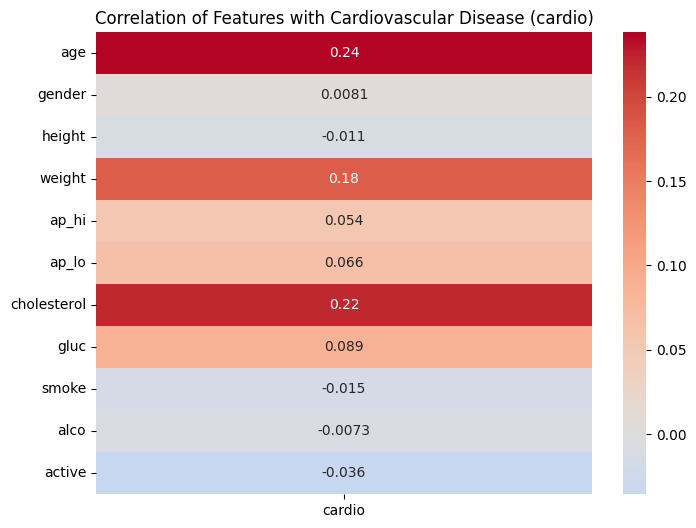

In [20]:
# Calculate correlation of all features with the 'cardio' column
correlations_with_cardio = health_data.corr()['cardio'].drop('cardio')

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlations_with_cardio.to_frame(), 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            cbar=True)

plt.title('Correlation of Features with Cardiovascular Disease (cardio)')
plt.show()

While the visualizations shows weak correlations between features and the target, regression trees can capture nonlinear relationships that may not be reflected here, so let us move onto implementing the model.

Total depth of the tree: 60


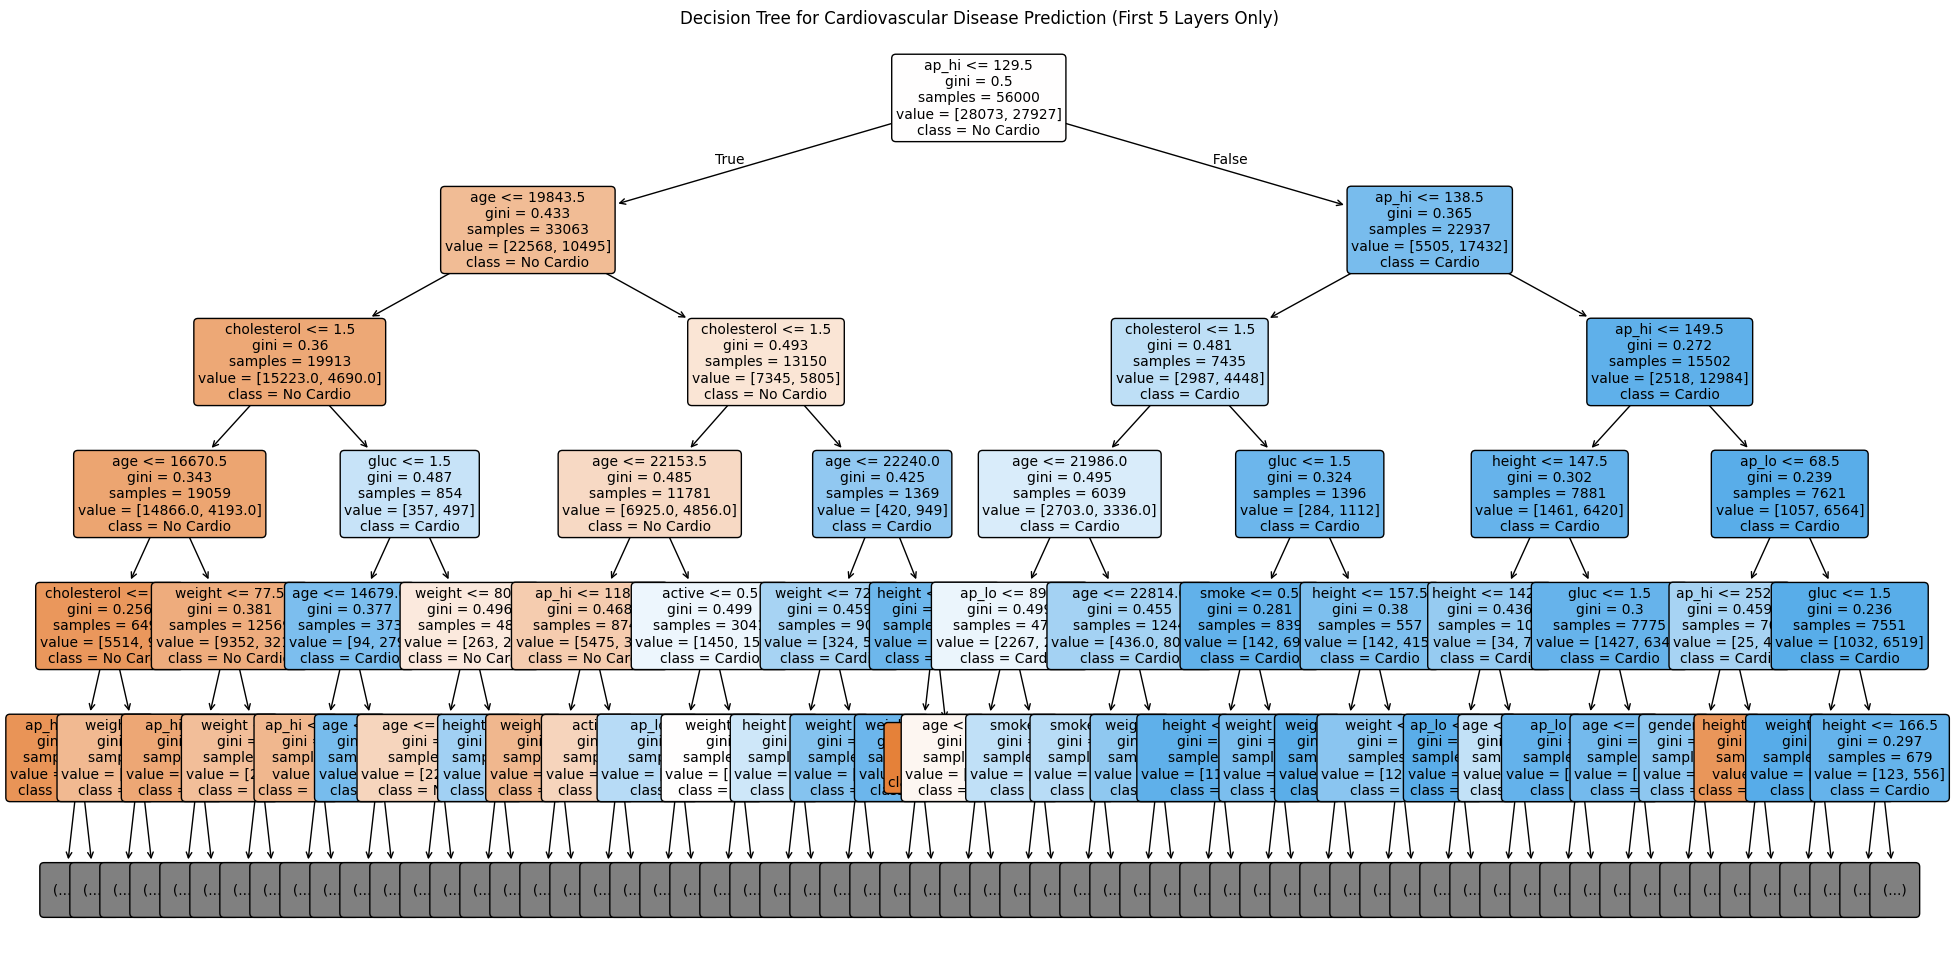

In [30]:
# Prepare features and target
X = health_data.drop(columns=["cardio"])
y = health_data["cardio"]
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build and train Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Print total number of layers (depth)
print(f"Total depth of the tree: {clf.get_depth()}")

# Plot only the first 5 layers
plt.figure(figsize=(24, 12))
plot_tree(clf,
          feature_names=X.columns,
          class_names=["No Cardio", "Cardio"],
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=5)   # <-- Limit visualization to first 5 layers
plt.title("Decision Tree for Cardiovascular Disease Prediction (First 5 Layers Only)")
plt.show()

Accuracy: 0.6389

Classification Report:

              precision    recall  f1-score   support

           0       0.64      0.65      0.64      6984
           1       0.64      0.63      0.64      7016

    accuracy                           0.64     14000
   macro avg       0.64      0.64      0.64     14000
weighted avg       0.64      0.64      0.64     14000



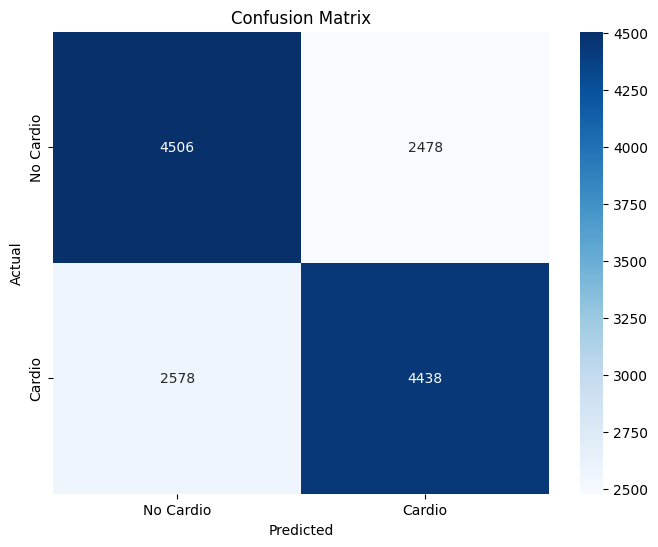

In [29]:
# Predict
y_pred = clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(8,6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                 xticklabels=["No Cardio", "Cardio"],
                 yticklabels=["No Cardio", "Cardio"])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# Store all accuracies
accuracies = []

# Train and test 10 different trees
for i in range(10):
    # Different random split every time
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Train a single Decision Tree
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    
    # Predict
    y_pred = clf.predict(X_test)
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Run {i+1}: Accuracy = {acc:.4f}")

# Average accuracy
average_accuracy = sum(accuracies) / len(accuracies)
print(f"\nAverage Accuracy over 10 runs: {average_accuracy:.4f}")

Run 1: Accuracy = 0.6298
Run 2: Accuracy = 0.6336
Run 3: Accuracy = 0.6321
Run 4: Accuracy = 0.6374
Run 5: Accuracy = 0.6291
Run 6: Accuracy = 0.6326
Run 7: Accuracy = 0.6327
Run 8: Accuracy = 0.6376
Run 9: Accuracy = 0.6388
Run 10: Accuracy = 0.6364

Average Accuracy over 10 runs: 0.6340
